In [71]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_aer import AerSimulator

In [ ]:
service = QiskitRuntimeService(channel='ibm_quantum', token="your_api_key")

**Encoding step (d=3)**

The encoding step below converts a single qubit into 3 qubits by repeating the initial qubit 2 more times. cx gate in the circuit replicates the initial data qubit to the next 2 qubits. Value of |0> in the initial qubit does not trigger the gates, and hence returns |000>, value of |1> trigger the gates and returns |111>. 

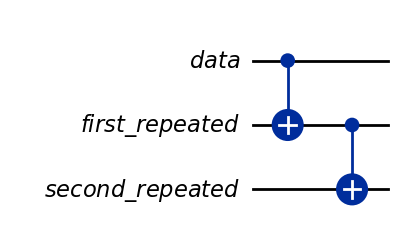

In [73]:
data_qubit = QuantumRegister(1, 'data')
first_repeated_qubit = QuantumRegister(1, 'first_repeated')
second_repeated_qubit = QuantumRegister(1, 'second_repeated')
encoding_circuit = QuantumCircuit(data_qubit, first_repeated_qubit, second_repeated_qubit)
encoding_circuit.cx(data_qubit[0], first_repeated_qubit[0])
encoding_circuit.cx(first_repeated_qubit[0], second_repeated_qubit[0])
encoding_circuit.draw("mpl")

**Addition of ancilla bits to the circuit**

The encoded qubits are connected to the ancilla qubits which are used to measure the error that has occured. This measurement is called the syndrome, which is represented by the 'measurements' variable in the given code. Barriers are introduced at each step to prevent any problems that may arise during the optimization step.

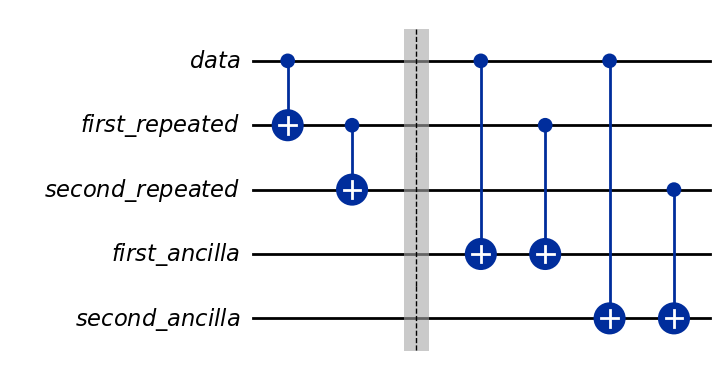

In [74]:
data_qubit = QuantumRegister(1, 'data')
first_repeated_qubit = QuantumRegister(1, 'first_repeated')
second_repeated_qubit = QuantumRegister(1, 'second_repeated')
first_ancilla = QuantumRegister(1, 'first_ancilla')
second_ancilla = QuantumRegister(1, 'second_ancilla')
circuit = QuantumCircuit(data_qubit, first_repeated_qubit, second_repeated_qubit, first_ancilla, second_ancilla)
circuit.cx(data_qubit[0], first_repeated_qubit[0])
circuit.cx(first_repeated_qubit[0], second_repeated_qubit[0])
circuit.barrier([0, 1, 2, 3, 4])
circuit.cx(data_qubit[0], first_ancilla[0])
circuit.cx(first_repeated_qubit[0], first_ancilla[0])
circuit.cx(data_qubit[0], second_ancilla[0])
circuit.cx(second_repeated_qubit[0], second_ancilla[0])
circuit.draw("mpl")

**Adding measurements to ancilla bits**

Ancilla bits are measured after the encoding step is complete

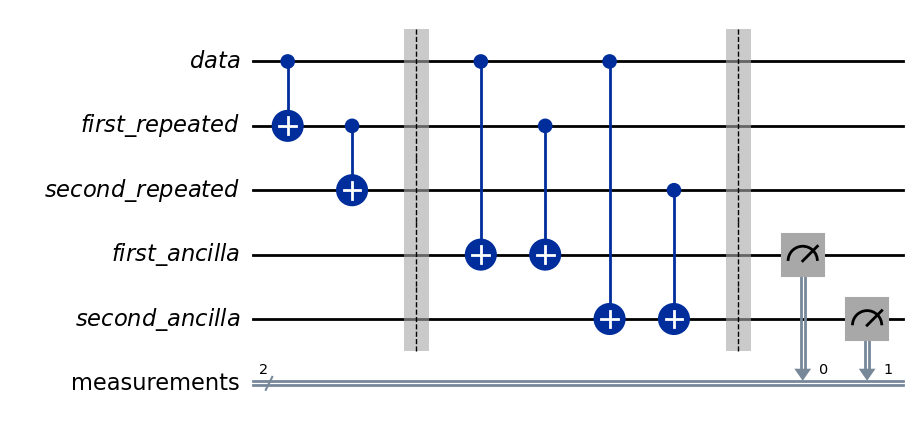

In [75]:
data_qubit = QuantumRegister(1, 'data')
first_repeated_qubit = QuantumRegister(1, 'first_repeated')
second_repeated_qubit = QuantumRegister(1, 'second_repeated')
first_ancilla = QuantumRegister(1, 'first_ancilla')
second_ancilla = QuantumRegister(1, 'second_ancilla')
measurements = ClassicalRegister(2, "measurements")
circuit = QuantumCircuit(data_qubit, first_repeated_qubit, second_repeated_qubit, first_ancilla, second_ancilla, measurements)
circuit.cx(data_qubit[0], first_repeated_qubit[0])
circuit.cx(first_repeated_qubit[0], second_repeated_qubit[0])
circuit.barrier([0, 1, 2, 3, 4])
circuit.cx(data_qubit[0], first_ancilla[0])
circuit.cx(first_repeated_qubit[0], first_ancilla[0])
circuit.cx(data_qubit[0], second_ancilla[0])
circuit.cx(second_repeated_qubit[0], second_ancilla[0])
circuit.barrier([0, 1, 2, 3, 4])
circuit.measure([first_ancilla[0], second_ancilla[0]], [measurements[0], measurements[1]])
circuit.draw("mpl")

**Apply correction**

Each state represented by the ancilla bits indicate a single source of error. There are a total of 4 different possible state for the ancilla bits, 00, 01, 10 and 11. State of 00 represents that there is no error in the qubits, 01 represents that there has been a bit flip in the third qubit(second_repeated_qubit), 10 represents that there has been a bit flip in the second qubit(first_repeated_qubit) and 11 represents that there has been a bit flip in the first qubit(data_qubit). By examining the states, appropriate error correction can take place, which is done using the conditional x gates which are applied to flip the bits corresponding to the state of the ancilla bits.

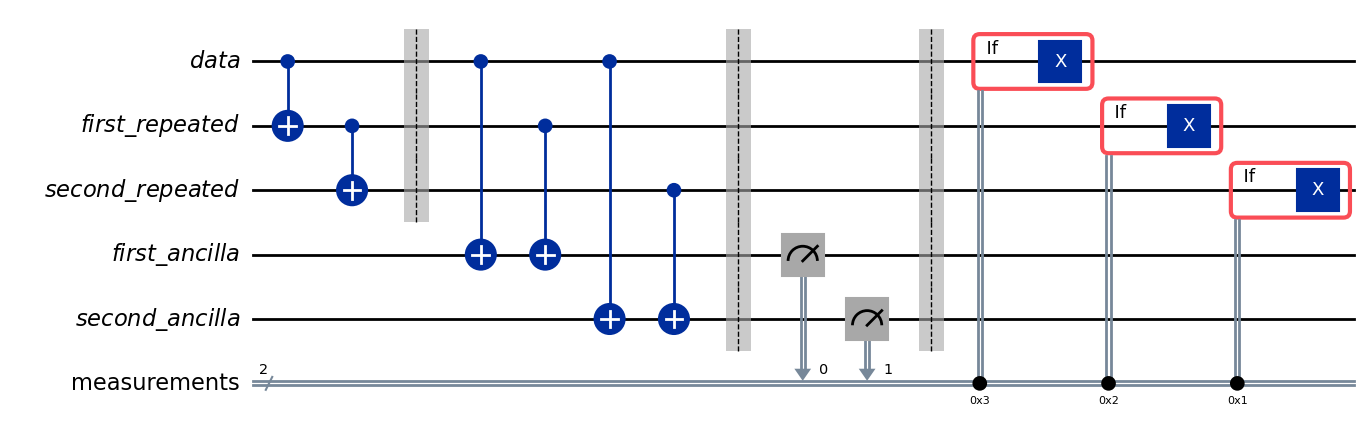

In [76]:
data_qubit = QuantumRegister(1, 'data')
first_repeated_qubit = QuantumRegister(1, 'first_repeated')
second_repeated_qubit = QuantumRegister(1, 'second_repeated')
first_ancilla = QuantumRegister(1, 'first_ancilla')
second_ancilla = QuantumRegister(1, 'second_ancilla')
measurements = ClassicalRegister(2, name="measurements")
circuit = QuantumCircuit(data_qubit, first_repeated_qubit, second_repeated_qubit, first_ancilla, second_ancilla, measurements)
circuit.cx(data_qubit[0], first_repeated_qubit[0])
circuit.cx(first_repeated_qubit[0], second_repeated_qubit[0])
circuit.barrier([0, 1, 2])
circuit.cx(data_qubit[0], first_ancilla[0])
circuit.cx(first_repeated_qubit[0], first_ancilla[0])
circuit.cx(data_qubit[0], second_ancilla[0])
circuit.cx(second_repeated_qubit[0], second_ancilla[0])
circuit.barrier([0, 1, 2, 3, 4])
circuit.measure([first_ancilla[0], second_ancilla[0]], [measurements[0], measurements[1]])
circuit.barrier([0, 1, 2, 3, 4])
with circuit.if_test((measurements, 3)):
    circuit.x(data_qubit[0])
with circuit.if_test((measurements, 2)):
    circuit.x(first_repeated_qubit[0])
with circuit.if_test((measurements, 1)):
    circuit.x(second_repeated_qubit[0])
circuit.draw("mpl")

**Adding final measurements of qubits**

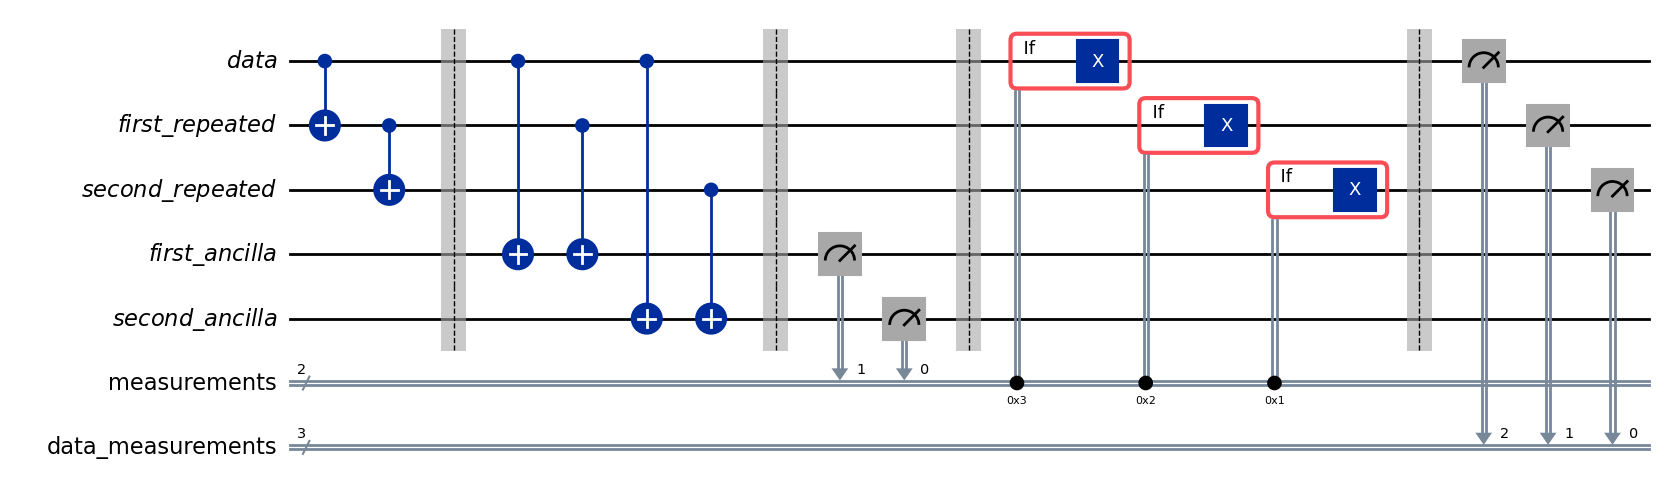

In [77]:
data_qubit = QuantumRegister(1, 'data')
first_repeated_qubit = QuantumRegister(1, 'first_repeated')
second_repeated_qubit = QuantumRegister(1, 'second_repeated')
first_ancilla = QuantumRegister(1, 'first_ancilla')
second_ancilla = QuantumRegister(1, 'second_ancilla')
measurements = ClassicalRegister(2, "measurements")
data_measurements = ClassicalRegister(3, "data_measurements")
circuit = QuantumCircuit(data_qubit, first_repeated_qubit, second_repeated_qubit, first_ancilla, second_ancilla, measurements, data_measurements)
circuit.cx(data_qubit[0], first_repeated_qubit[0])
circuit.cx(first_repeated_qubit[0], second_repeated_qubit[0])
circuit.barrier([0, 1, 2, 3, 4])
circuit.cx(data_qubit[0], first_ancilla[0])
circuit.cx(first_repeated_qubit[0], first_ancilla[0])
circuit.cx(data_qubit[0], second_ancilla[0])
circuit.cx(second_repeated_qubit[0], second_ancilla[0])
circuit.barrier([0, 1, 2, 3, 4])
circuit.measure([first_ancilla[0], second_ancilla[0]], [measurements[1], measurements[0]])
circuit.barrier([0, 1, 2, 3, 4])
with circuit.if_test((measurements, 3)):
    circuit.x(data_qubit[0])
with circuit.if_test((measurements, 2)):
    circuit.x(first_repeated_qubit[0])
with circuit.if_test((measurements, 1)):
    circuit.x(second_repeated_qubit[0])
circuit.barrier([0, 1, 2, 3, 4])
circuit.measure([data_qubit[0], first_repeated_qubit[0], second_repeated_qubit[0]], [data_measurements[2], data_measurements[1], data_measurements[0]])
circuit.draw("mpl")

**Separate code into functions in a single class**

In [78]:
class RepetitionCodeCircuit:
    def __init__(self, data_qubit, first_repeated_qubit, second_repeated_qubit, first_ancilla, second_ancilla, measurements, data_measurements):
        self.data_qubit = data_qubit
        self.first_repeated_qubit = first_repeated_qubit
        self.second_repeated_qubit = second_repeated_qubit
        self.first_ancilla = first_ancilla
        self.second_ancilla = second_ancilla
        self.measurements = measurements
        self.data_measurements = data_measurements
        self.circuit = QuantumCircuit(self.data_qubit, self.first_repeated_qubit, self.second_repeated_qubit, self.first_ancilla, self.second_ancilla, self.measurements, self.data_measurements)

    def apply_encoding(self, noise_index=None):
        qubits = [self.data_qubit, self.first_repeated_qubit, self.second_repeated_qubit]
        self.circuit.cx(self.data_qubit[0], self.first_repeated_qubit[0])
        self.circuit.cx(self.first_repeated_qubit[0], self.second_repeated_qubit[0])
        if noise_index is not None:
            self.circuit.x(qubits[noise_index])
        self.circuit.barrier([0, 1, 2, 3, 4])
    
    def apply_detection(self):
        self.circuit.cx(self.data_qubit[0], self.first_ancilla[0])
        self.circuit.cx(self.first_repeated_qubit[0], self.first_ancilla[0])
        self.circuit.cx(self.data_qubit[0], self.second_ancilla[0])
        self.circuit.cx(self.second_repeated_qubit[0], self.second_ancilla[0])
        self.circuit.barrier([0, 1, 2, 3, 4])
    
    def apply_detection_measurements(self):
        self.circuit.measure([self.first_ancilla[0], self.second_ancilla[0]], [self.measurements[1], self.measurements[0]])
        self.circuit.barrier([0, 1, 2, 3, 4])    
    
    def apply_error_correction(self):
        with self.circuit.if_test((self.measurements, 3)):
            self.circuit.x(self.data_qubit[0])
        with self.circuit.if_test((self.measurements, 2)):
            self.circuit.x(self.first_repeated_qubit[0])
        with self.circuit.if_test((self.measurements, 1)):
            self.circuit.x(self.second_repeated_qubit[0])
        self.circuit.barrier([0, 1, 2, 3, 4])
    
    def apply_final_measurement(self):
        self.circuit.measure([self.data_qubit[0], self.first_repeated_qubit[0], self.second_repeated_qubit[0]], [self.data_measurements[2], self.data_measurements[1], self.data_measurements[0]])

In [79]:
data_qubit = QuantumRegister(1, 'data')
first_repeated_qubit = QuantumRegister(1, 'first_repeated')
second_repeated_qubit = QuantumRegister(1, 'second_repeated')
first_ancilla = QuantumRegister(1, 'first_ancilla')
second_ancilla = QuantumRegister(1, 'second_ancilla')
measurements = ClassicalRegister(2, "measurements")
data_measurements = ClassicalRegister(3, "data_measurements")

**Teesting circuits (Simulator)**

The circuits are first tested in a simulator environment, where it assumes that there is no errors except the manually introduced errors(bit flips). The output observed consist of 5 bits, where the first 3 bits correspond to the measurement of the input qubits (|000> or |111>), and the last 2 bits correspond to the measurement of the ancilla bits. It can be observed that all measurement of the input qubits are 000, as there are no errors other than the one introduced manually, which is also corrected at the error correction step. However, we can still observe the different states of the ancilla bits, which represent different positions where the bit flip has occured. The circuit is tested using |0> as the initial qubit, but can be generalised to |1>.

In [80]:
circuit_without_noise = RepetitionCodeCircuit(data_qubit, first_repeated_qubit, second_repeated_qubit, first_ancilla, second_ancilla, measurements, data_measurements)
circuit_without_noise.apply_encoding()
circuit_without_noise.apply_detection()
circuit_without_noise.apply_detection_measurements()
circuit_without_noise.apply_error_correction()
circuit_without_noise.apply_final_measurement()

circuit_with_noise_at_first_qubit = RepetitionCodeCircuit(data_qubit, first_repeated_qubit, second_repeated_qubit, first_ancilla, second_ancilla, measurements, data_measurements)
circuit_with_noise_at_first_qubit.apply_encoding(noise_index=0)
circuit_with_noise_at_first_qubit.apply_detection()
circuit_with_noise_at_first_qubit.apply_detection_measurements()
circuit_with_noise_at_first_qubit.apply_error_correction()
circuit_with_noise_at_first_qubit.apply_final_measurement()

circuit_with_noise_at_second_qubit = RepetitionCodeCircuit(data_qubit, first_repeated_qubit, second_repeated_qubit, first_ancilla, second_ancilla, measurements, data_measurements)
circuit_with_noise_at_second_qubit.apply_encoding(noise_index=1)
circuit_with_noise_at_second_qubit.apply_detection()
circuit_with_noise_at_second_qubit.apply_detection_measurements()
circuit_with_noise_at_second_qubit.apply_error_correction()
circuit_with_noise_at_second_qubit.apply_final_measurement()

circuit_with_noise_at_third_qubit = RepetitionCodeCircuit(data_qubit, first_repeated_qubit, second_repeated_qubit, first_ancilla, second_ancilla, measurements, data_measurements)
circuit_with_noise_at_third_qubit.apply_encoding(noise_index=2)
circuit_with_noise_at_third_qubit.apply_detection()
circuit_with_noise_at_third_qubit.apply_detection_measurements()
circuit_with_noise_at_third_qubit.apply_error_correction()
circuit_with_noise_at_third_qubit.apply_final_measurement()

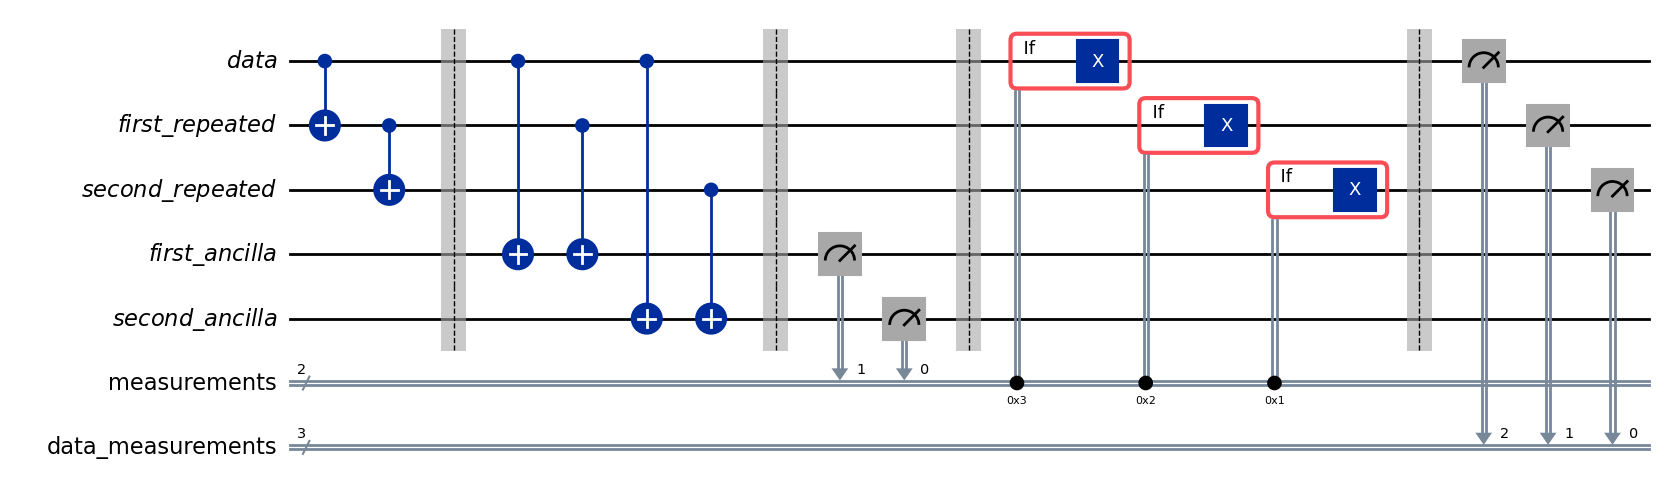

In [81]:
circuit_without_noise.circuit.draw("mpl")

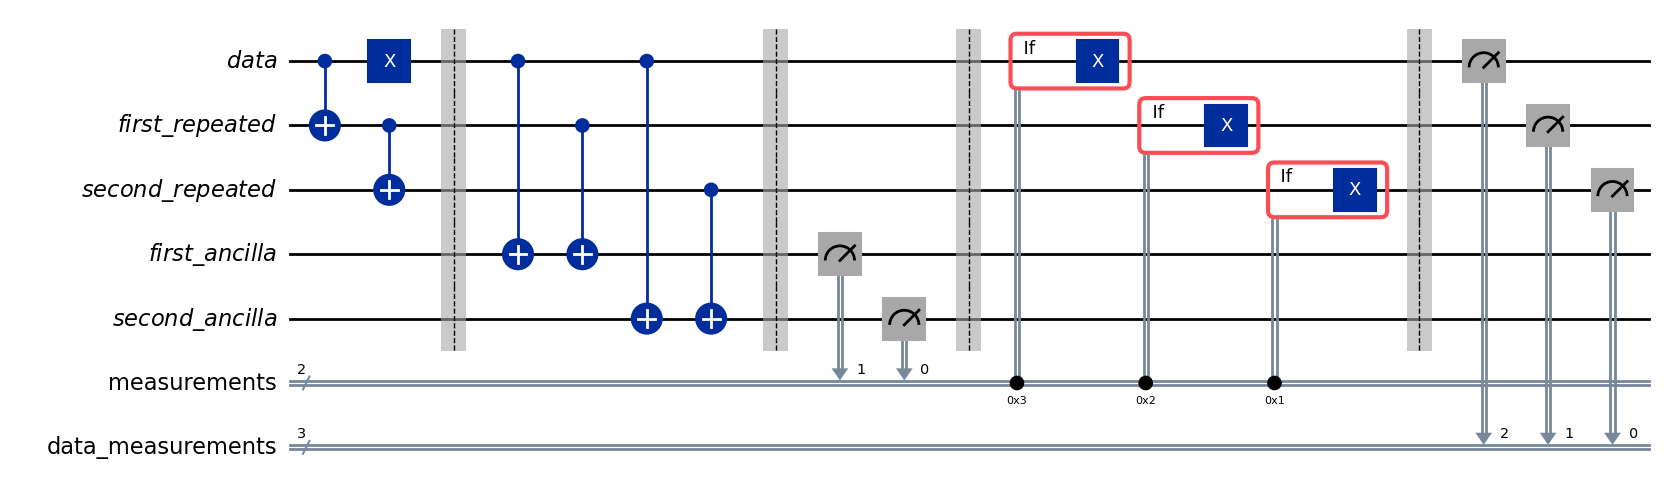

In [82]:
circuit_with_noise_at_first_qubit.circuit.draw("mpl")

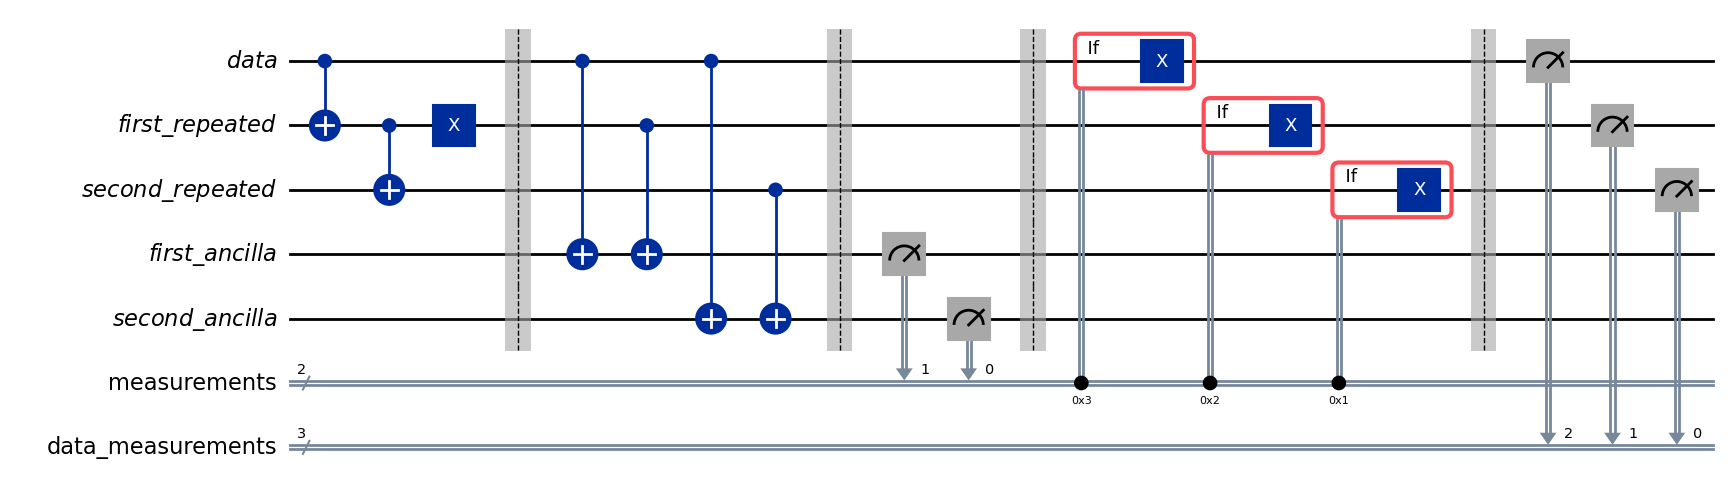

In [83]:
circuit_with_noise_at_second_qubit.circuit.draw("mpl")

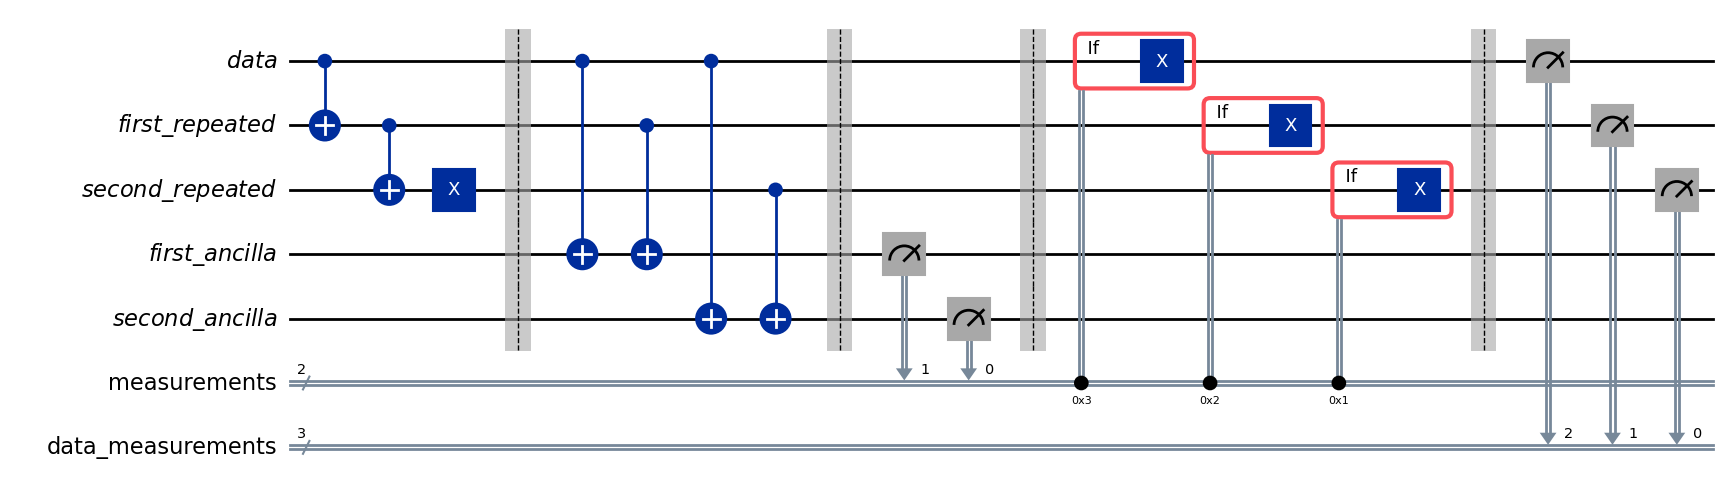

In [84]:
circuit_with_noise_at_third_qubit.circuit.draw("mpl")

**No noise**

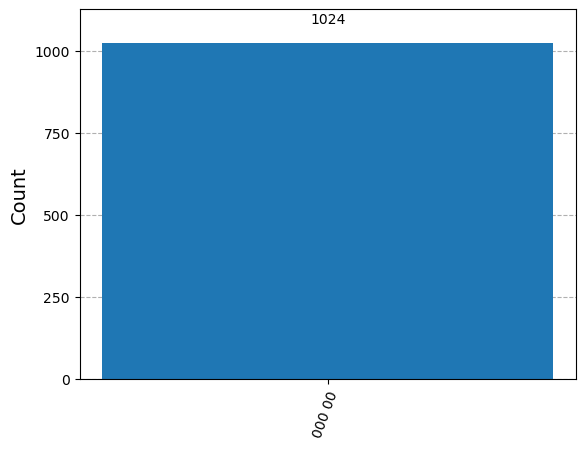

In [85]:
backend = service.least_busy(operational=True, simulator=False)
simulator = AerSimulator()
pm = generate_preset_pass_manager(backend=backend)
physical = pm.run(circuit_without_noise.circuit)
result = simulator.run(physical).result()
counts = result.get_counts(physical)
plot_histogram(counts)

**Noise at first qubit**

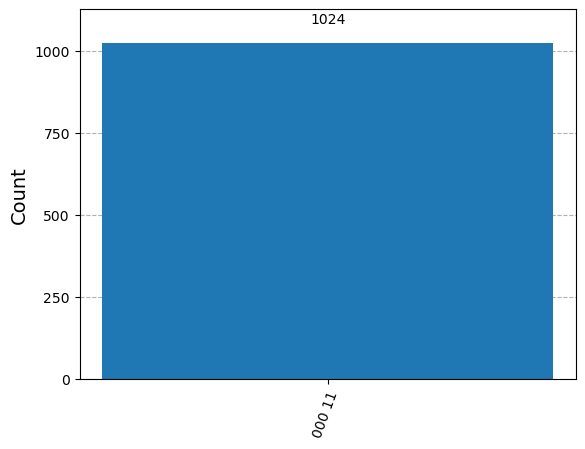

In [86]:
backend = service.least_busy(operational=True, simulator=False)
simulator = AerSimulator()
pm = generate_preset_pass_manager(backend=backend)
physical = pm.run(circuit_with_noise_at_first_qubit.circuit)
result = simulator.run(physical).result()
counts = result.get_counts(physical)
plot_histogram(counts)

**Noise at second qubit**

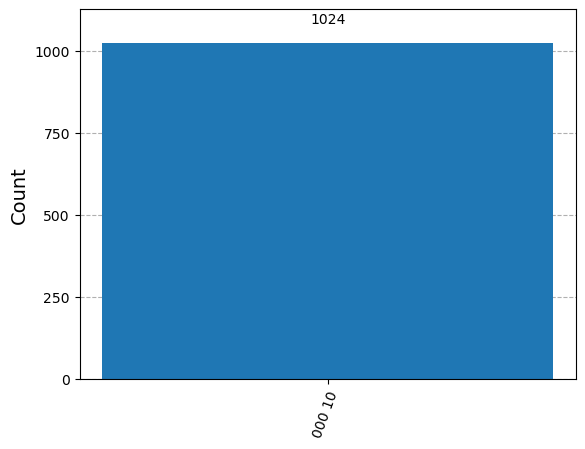

In [87]:
backend = service.least_busy(operational=True, simulator=False)
simulator = AerSimulator()
pm = generate_preset_pass_manager(backend=backend)
physical = pm.run(circuit_with_noise_at_second_qubit.circuit)
result = simulator.run(physical).result()
counts = result.get_counts(physical)
plot_histogram(counts)

**Noise at third qubit**

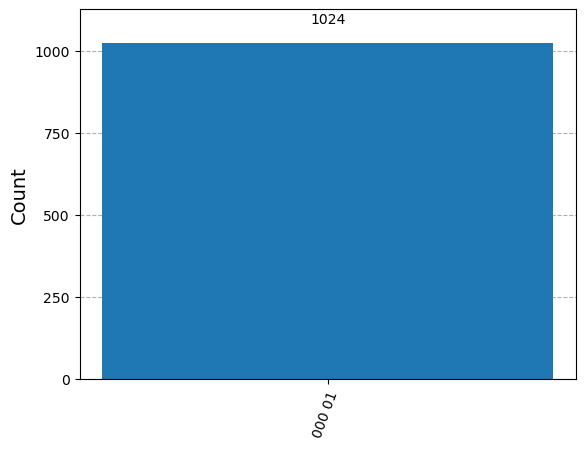

In [88]:
backend = service.least_busy(operational=True, simulator=False)
simulator = AerSimulator()
pm = generate_preset_pass_manager(backend=backend)
physical = pm.run(circuit_with_noise_at_third_qubit.circuit)
result = simulator.run(physical).result()
counts = result.get_counts(physical)
plot_histogram(counts)

**Running in actual machines**

Testing the same circuit in real machines give rise to a very different result from the ones obtained from the simulator. This is due to the noises(erorrs) introduced naturally when the circuit is being run. There are a total of 8 possible states for the qubits, where only 000 is the desired outcome for the circuit. Eventhough natural noises randomly flip the bits, it can still be seen that correct error correction is taking place as the majority of the outcome is 000.

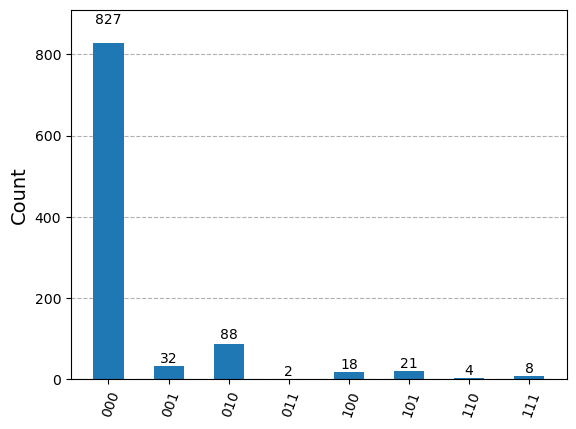

In [89]:
backend = service.least_busy(operational=True, simulator=False)
sampler = Sampler(backend)
pm = generate_preset_pass_manager(backend=backend)
physical = pm.run(circuit_without_noise.circuit)
job = sampler.run([physical], shots=1000)
result = job.result()[0]
counts_no_noise = result.data.data_measurements.get_counts()
plot_histogram(counts_no_noise)

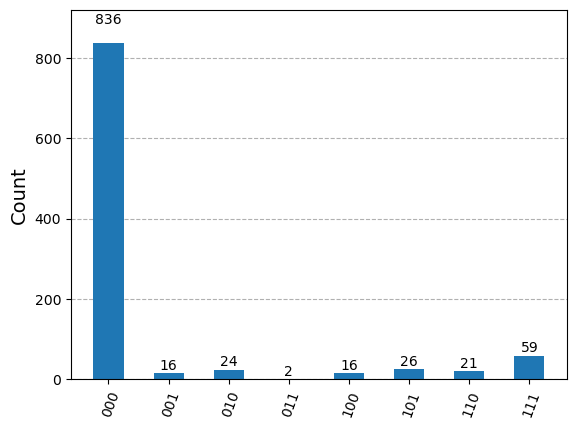

In [90]:
backend = service.least_busy(operational=True, simulator=False)
sampler = Sampler(backend)
pm = generate_preset_pass_manager(backend=backend)
physical = pm.run(circuit_with_noise_at_first_qubit.circuit)
job = sampler.run([physical], shots=1000)
result = job.result()[0]
counts_noise_at_first_qubit = result.data.data_measurements.get_counts()
plot_histogram(counts_noise_at_first_qubit)

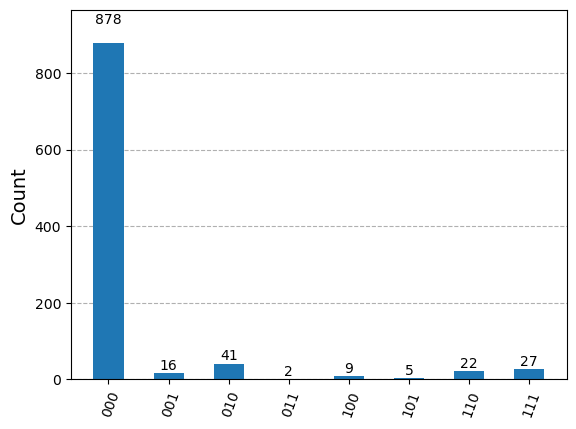

In [91]:
backend = service.least_busy(operational=True, simulator=False)
sampler = Sampler(backend)
pm = generate_preset_pass_manager(backend=backend)
physical = pm.run(circuit_with_noise_at_second_qubit.circuit)
job = sampler.run([physical], shots=1000)
result = job.result()[0]
counts_noise_at_second_qubit = result.data.data_measurements.get_counts()
plot_histogram(counts_noise_at_second_qubit)

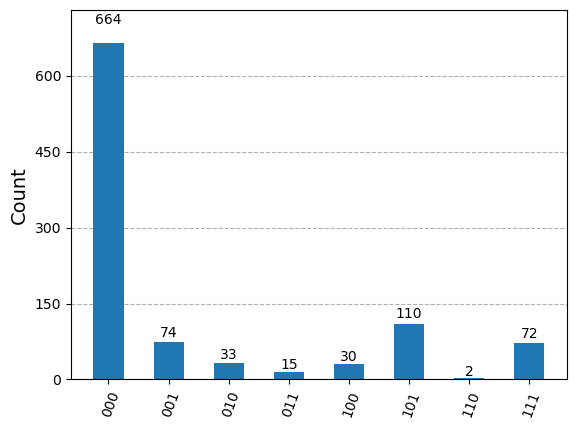

In [92]:
backend = service.least_busy(operational=True, simulator=False)
sampler = Sampler(backend)
pm = generate_preset_pass_manager(backend=backend)
physical = pm.run(circuit_with_noise_at_third_qubit.circuit)
job = sampler.run([physical], shots=1000)
result = job.result()[0]
counts_noise_at_third_qubit = result.data.data_measurements.get_counts()
plot_histogram(counts_noise_at_third_qubit)

**Decoding**

Decoding is performed by taking the majority bit as the output bit. For example, 001 will be decoded to 0 as there are 2 0s and only one 1, making 0 the majority. In the given examples, [000, 001, 010, 100] will be mapped to 0, and [011, 101, 110, 111] will be mapped to 1.

In [93]:
def generate_counts(counts):
    new_counts = {}
    new_counts[0] = 0
    new_counts[1] = 0
    for key in counts:
        key_sum = int(key[0]) + int(key[1]) + int(key[2])
        if key_sum >= 2:
            new_counts[1] += counts[key]
        else:
            new_counts[0] += counts[key]
    return new_counts

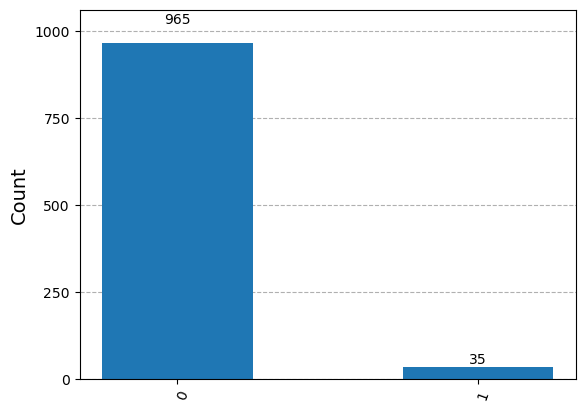

In [94]:
new_counts = generate_counts(counts_no_noise)
plot_histogram(new_counts)

In [95]:
if new_counts[0] > new_counts[1]:
    decoded_value = 0
else:
    decoded_value = 1
print(f"Decoded value = {decoded_value}")

Decoded value = 0


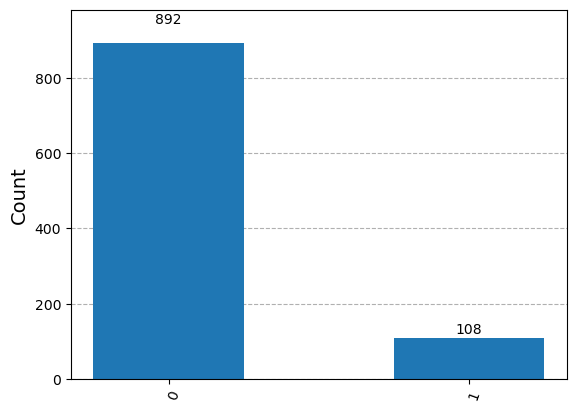

In [96]:
new_counts = generate_counts(counts_noise_at_first_qubit)
plot_histogram(new_counts)

In [97]:
if new_counts[0] > new_counts[1]:
    decoded_value = 0
else:
    decoded_value = 1
print(f"Decoded value = {decoded_value}")

Decoded value = 0


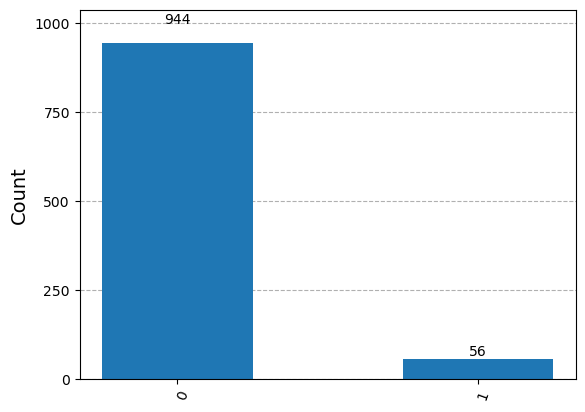

In [98]:
new_counts = generate_counts(counts_noise_at_second_qubit)
plot_histogram(new_counts)

In [99]:
if new_counts[0] > new_counts[1]:
    decoded_value = 0
else:
    decoded_value = 1
print(f"Decoded value = {decoded_value}")

Decoded value = 0


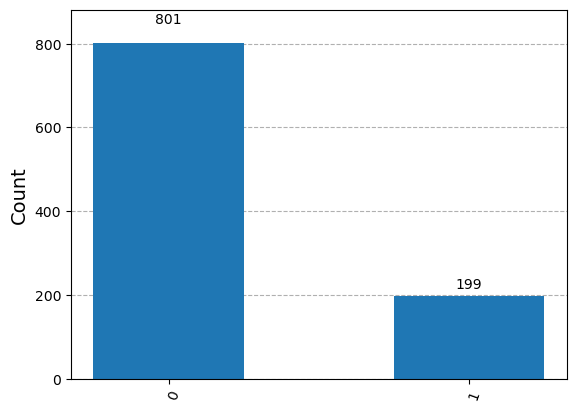

In [100]:
new_counts = generate_counts(counts_noise_at_third_qubit)
plot_histogram(new_counts)

In [101]:
if new_counts[0] > new_counts[1]:
    decoded_value = 0
else:
    decoded_value = 1
print(f"Decoded value = {decoded_value}")

Decoded value = 0


**Conclusion**

Distance 3 repetition code for quantum error correction is effective in correcting a single bit flip in the given code. However, it is unable to correct more than 1 bit flip in the given code, resulting in an incorrect output. Moreover, it is unable to detect phase changes. Therefore, this circuit can only be applied to correcting a single bit flip in the repetition code.

**References**

Quantum Error Correction for Beginners, https://arxiv.org/pdf/0905.2794

Build repetition codes, https://learning.quantum.ibm.com/tutorial/build-repetition-codes
